In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
2


##Visualise data

In [ ]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [ ]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [ ]:
npimg = np.transpose(npimg,(1,2,0))
print(npimg.shape)

(32, 32, 3)


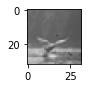

In [ ]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [ ]:
##function for displaying the image
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

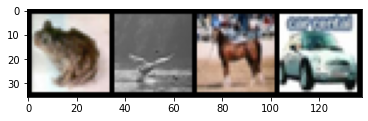

frog bird horse car


In [ ]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))


##single convolution layer

In [ ]:
import torch.nn as nn
class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,16,3,padding=(1,1),stride=(2,2)) #nn.Conv2d(no_of_channels,output_channels,kernal_size)

  def forward(self, x):
        x = self.conv1(x)
        return x

  

In [ ]:
net = FirstCNN()

In [ ]:
out = net(images)
out.shape # batch_size,output_channels,(16,16)-> image size since stride is 2 image is halved

torch.Size([4, 16, 16, 16])

In [ ]:
for params in net.parameters():
  print(params.shape) 
  #print(params)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [ ]:
out1 = out[0, 0, :, :].detach().numpy() #0th batch 0th output_channel, image_size
print(out1.shape) #image_size

(16, 16)


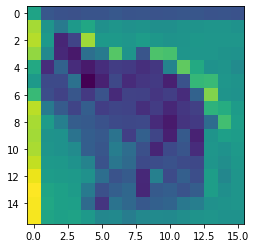

In [ ]:
plt.imshow(out1)
plt.show()

##Deep convolutional network

In [ ]:
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2,self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,8,3), #(N,3,32,32) -> (N,8,30,30)
        nn.Conv2d(8,16,3) #(N,8,30,30) -> (N,16,28,28)
    )

  def forward(self,x):
    x=self.model(x)
    return (x)

In [ ]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

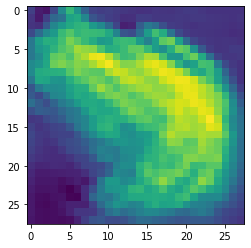

In [ ]:
plt.imshow(out[0,1,:,:].detach().numpy())
plt.show()

In [ ]:
# with pooling layer
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3,self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,6,5), #(N,3,32,32) => (N,6,28,28)
        nn.AvgPool2d(2, stride=2), #(N,6,28,28) => (N,6,14,14)
        nn.Conv2d(6, 16, 5), #(N,6,14,14) => (N,16,10,10)
        nn.AvgPool2d(2,stride=2)  #(N,6,14,14) => (N,16,5,5)
    )
  def forward(self,x):
    x = self.model(x)
    return x

In [ ]:
net = FirstCNN_v3()
out=net(images)
out.shape

torch.Size([4, 16, 5, 5])

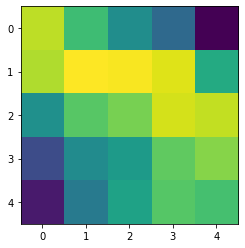

In [ ]:
plt.imshow(out[0,1,:,:].detach().numpy())
plt.show()

##Le Net

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3,6,5), #(N,3,32,32) => (N,6,28,28)
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2), #(N,6,28,28) => (N,6,14,14)
        nn.Conv2d(6,16,5), # (N, 6, 14, 14) -> (N, 16, 10, 10)  
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2) #(N,16,10,10) => (N,16,5,5)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400,120), 
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.Linear(84,10)
    )
  def forward(self,x):
    x = self.cnn_model(x)
    x = x.view(x.size(0),-1) #(N, 16, 5, 5) => (N,16*5*5) => (N,400) (flattening)
    x = self.fc_model(x)
    return x

In [ ]:
net = LeNet()
out = net(images)


In [ ]:
out.shape

torch.Size([4, 10])

In [ ]:
out

tensor([[-0.0348, -0.0980, -0.0273, -0.0750, -0.0437, -0.0439, -0.0403,  0.0577,
         -0.0716,  0.0066],
        [-0.0403, -0.1167, -0.0423, -0.0684, -0.0470, -0.0410, -0.0322,  0.0693,
         -0.0824,  0.0259],
        [-0.0402, -0.1093, -0.0366, -0.0731, -0.0535, -0.0384, -0.0522,  0.0690,
         -0.0882,  0.0224],
        [-0.0412, -0.1245, -0.0492, -0.0738, -0.0510, -0.0210, -0.0448,  0.0705,
         -0.1006,  0.0472]], grad_fn=<AddmmBackward>)

In [ ]:
max_value,pred_class = torch.max(out.data,1)
print(max_value,pred_class)

tensor([0.0577, 0.0693, 0.0690, 0.0705]) tensor([7, 7, 7, 7])


##Training LeNet

In [ ]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
net = LeNet()

In [ ]:
import torch.optim as optim

loss_func = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
opt

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [ ]:
def evaluation(dataloader):
  total,correct = 0,0
  for data in dataloader:
    inputs,labels = data
    outputs = net(inputs)
    _,pred = torch.max(outputs.data,1)
    total += labels.size(0)
    correct+= (pred == labels).sum().item()
    
  return 100 * correct / total

Epoch: 0/16, Test Accuracy: 37.90,Train Accuracy: 38.21
Epoch: 1/16, Test Accuracy: 43.18,Train Accuracy: 43.55
Epoch: 2/16, Test Accuracy: 47.33,Train Accuracy: 48.57
Epoch: 3/16, Test Accuracy: 50.20,Train Accuracy: 51.57
Epoch: 4/16, Test Accuracy: 51.28,Train Accuracy: 53.30
Epoch: 5/16, Test Accuracy: 51.88,Train Accuracy: 54.43
Epoch: 6/16, Test Accuracy: 52.91,Train Accuracy: 56.72
Epoch: 7/16, Test Accuracy: 52.87,Train Accuracy: 57.63
Epoch: 8/16, Test Accuracy: 54.27,Train Accuracy: 59.27
Epoch: 9/16, Test Accuracy: 54.83,Train Accuracy: 60.65
Epoch: 10/16, Test Accuracy: 54.80,Train Accuracy: 61.58
Epoch: 11/16, Test Accuracy: 54.72,Train Accuracy: 61.82
Epoch: 12/16, Test Accuracy: 54.91,Train Accuracy: 62.74
Epoch: 13/16, Test Accuracy: 54.67,Train Accuracy: 62.80
Epoch: 14/16, Test Accuracy: 56.08,Train Accuracy: 65.07
Epoch: 15/16, Test Accuracy: 55.82,Train Accuracy: 65.61


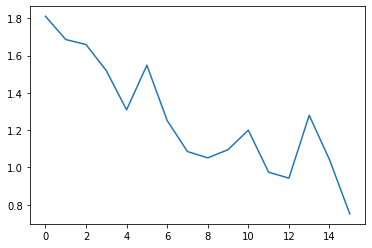

CPU times: user 6min 33s, sys: 2.36 s, total: 6min 36s
Wall time: 6min 36s


In [ ]:
%%time
loss_arr = []
loss_epoch_arr =[]
max_epochs = 16

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels= data
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_func(outputs,labels)
    loss.backward()
    opt.step()

    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())

  print('Epoch: %d/%d, Test Accuracy: %0.2f,Train Accuracy: %0.2f' %(epoch,max_epochs,evaluation(testloader),evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
def evaluation(dataloader):
  total,correct = 0,0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [ ]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
%%time
loss_arr = []
loss_epoch_arr =[]
max_epochs = 16

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels= data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_func(outputs,labels)
    loss.backward()
    opt.step()

CPU times: user 1min 31s, sys: 677 ms, total: 1min 31s
Wall time: 1min 32s


In [ ]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 56.04, Train acc: 65.12


##Basic Visualisation

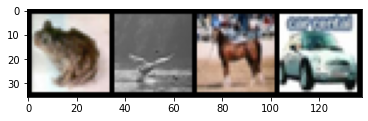

In [ ]:
imshow(torchvision.utils.make_grid(images))

In [ ]:
net = net.to('cpu')

In [ ]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [ ]:
#checking the output of first convolutional layer in LeNet
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

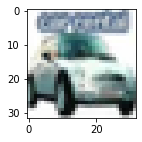

In [ ]:
image_id = 3
plt.figure(figsize=(2,2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


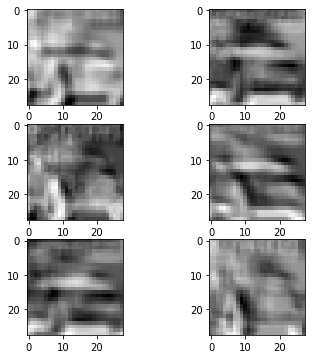

In [ ]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

#Exercises 

In [ ]:
# With ReLU activation function
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3,6,5), #(N,3,32,32) => (N,6,28,28)
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2), #(N,6,28,28) => (N,6,14,14)
        nn.Conv2d(6,16,5), # (N, 6, 14, 14) -> (N, 16, 10, 10)  
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2) #(N,16,10,10) => (N,16,5,5)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400,120), 
        nn.ReLU(),
        nn.Linear(120,84),
        nn.ReLU(),
        nn.Linear(84,10)
    )
  def forward(self,x):
    x = self.cnn_model(x)
    x = x.view(x.size(0),-1) #(N, 16, 5, 5) => (N,16*5*5) => (N,400) (flattening)
    x = self.fc_model(x)
    return x

In [ ]:
net = LeNet().to(device)

In [ ]:
loss_func = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
opt

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [ ]:
%%time
loss_arr = []
loss_epoch_arr =[]
max_epochs = 16

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels= data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_func(outputs,labels)
    loss.backward()
    opt.step()

CPU times: user 1min 31s, sys: 732 ms, total: 1min 32s
Wall time: 1min 32s


In [ ]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 56.69, Train acc: 67.03


##Adding L2 Regularization

In [ ]:
net = LeNet().to(device)
opt = optim.Adam(net.parameters(),weight_decay=1,lr=0.01)

In [ ]:
opt

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 1
)

In [ ]:
def evaluation(dataloader):
  total,correct = 0,0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

Epoch: 0/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 1/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 2/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 3/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 4/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 5/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 6/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 7/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 8/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 9/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 10/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 11/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 12/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 13/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 14/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 15/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 16/20, Test Accuracy: 10.00,Train Accuracy: 10.00
Epoch: 17/20, Test Accuracy: 10.00,Train 

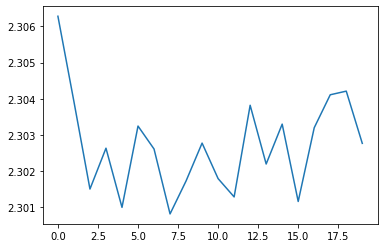

CPU times: user 3min 48s, sys: 1.6 s, total: 3min 50s
Wall time: 3min 50s


In [ ]:
%%time
loss_arr = []
loss_epoch_arr =[]
max_epochs = 20

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels= data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_func(outputs,labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())

  print('Epoch: %d/%d, Test Accuracy: %0.2f,Train Accuracy: %0.2f' %(epoch,max_epochs,evaluation(testloader),evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()